In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import mcu
import simple_angles_dataset_generator as simple_angles_gen
import dataset_generator


In [19]:
figure_num = 30
figure_point_cnt = 200
deterministic_param_scatter = False
p = 2
noise_level=0
lw = [0, 0]
up = [45, 45]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars = np.insert(control_vars, 0, 0, axis=1)
figures = dataset_generator.generate_array_of_figures(control_vars, simple_angles_gen.generate_angles_points, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 1
c = 1e5
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

ld_embedding = mcu.reduce_dimensions(q, 2)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
print(regression_matrix)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means
reconstructed_y_to_params = standardized_x * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_rre_heatmap(np.linalg.norm(ld_embedding_to_params - reconstructed_y_to_params, axis=1),
                     reconstructed_y_to_params)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_graph(edges, ld_embedding_to_params, reconstructed_y_to_params)

[[ 0.00000000e+00  0.00000000e+00]
 [ 4.95512185e+01 -2.90685766e-01]
 [ 1.55159311e+02 -6.99318168e-02]]


LinAlgError: Last 2 dimensions of the array must be square

-----------
x_opt  = [40.43765244 16.56936171], x_err = 312.3863340318774
x_real = [6.24159459 6.06166233]
-----------
x_opt  = [11.03257575  7.31620564], x_err = 155.99206670881938
x_real = [8.98167682 3.18879371]
-----------
x_opt  = [40.43765244 38.33125973], x_err = 382.8572182403233
x_real = [7.7084849  4.72435624]
-----------
x_opt  = [40.43765244 38.5780412 ], x_err = 511.05043962559887
x_real = [6.04751726 2.50492417]
-----------
x_opt  = [40.43765244 38.5780412 ], x_err = 357.1908932627181
x_real = [8.47977662 6.26199202]
-----------
x_opt  = [40.43765244 21.77259598], x_err = 1072.8556998393278
x_real = [4.27896889 8.24378677]
-----------
x_opt  = [40.43765244 38.5780412 ], x_err = 1312.0556217566138
x_real = [6.12599294 1.49167562]
-----------
x_opt  = [11.03257575  7.31620564], x_err = 321.56636397939997
x_real = [8.32995777 2.74630559]
-----------
x_opt  = [40.43765244 31.08182493], x_err = 254.17959402414309
x_real = [7.00809234 5.01225014]
-----------
x_opt  = [11.032575

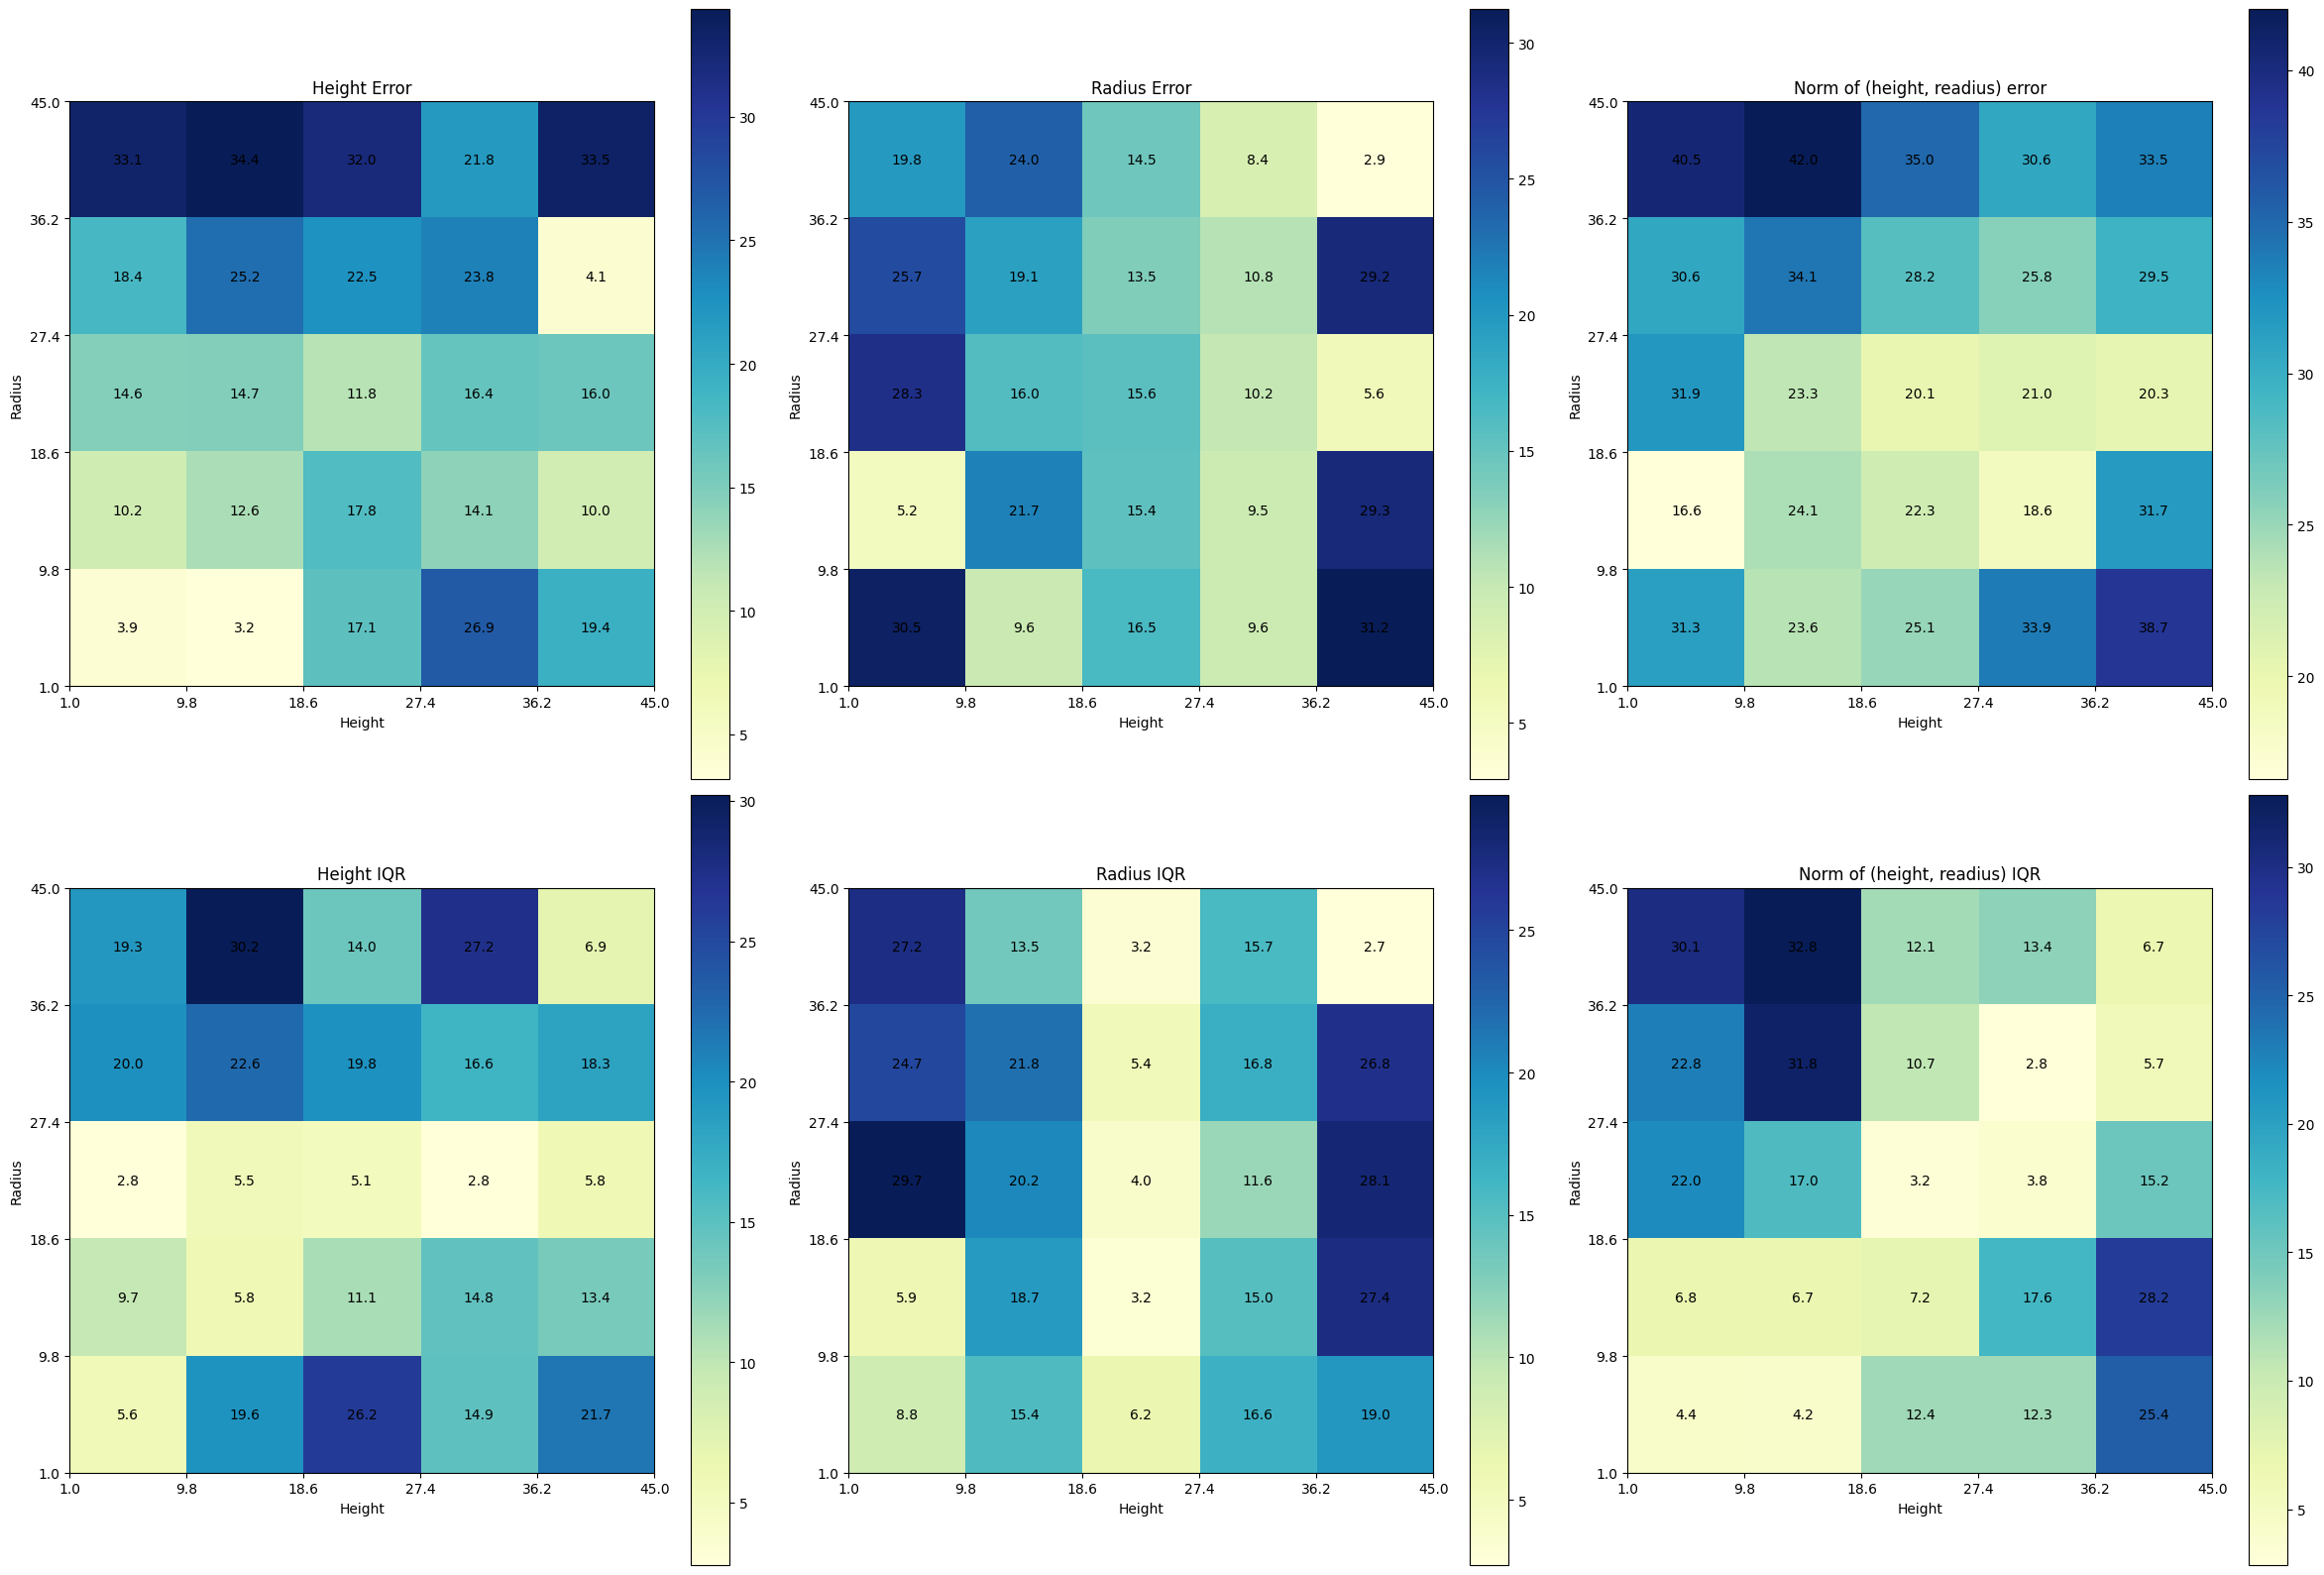

In [8]:
pieces_cnt = 5
test_data_size = 10
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, simple_angles_gen.generate_angles_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

In [ ]:
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, simple_angles_gen.generate_angles_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)